In [15]:
import pandas as pd
import pickle
import unidecode
import re
import matplotlib.pyplot as plt
import time
import seaborn as sns
import math
import numpy as np

def read_pickle(file_name):
    '''Function to read pickles faster'''
    pickle_in = open(file_name, 'rb')
    variable = pickle.load(pickle_in)
    return variable

def write_pickle(variable, file_name):
    '''Function to write pickles faster'''
    pickle_out = open(file_name, 'wb')
    pickle.dump(variable, pickle_out)

In [2]:
fields = ['Art','Biology','Business','Chemistry',\
          'Computer Science','Economics','Engineering'\
          ,'Environmental Science','Geography','Geology',\
         'History','Materials Science','Mathematics','Medicine',\
          'Philosophy','Physics','Political Science','Psychology','Sociology']

In [3]:
colors = {'all': 'grey',
 'men': '#009E73',
 'women': '#E69F00',
 'Male': '#009E73',
 'Female': '#E69F00',
 'male': '#009E73',
 'female': '#E69F00',
 'portuguese': '#377eb8',
 'english': '#d95f02',
 'Male_darker': '#00523b',
 'Female_darker': '#e67900',
 'Mixing_gender': '#794112'}

In [4]:
import matplotlib
import seaborn as sns
customPalette = dict()
import colorsys

def scale_lightness(rgb, scale_l):
    # convert rgb to hls
    h, l, s = colorsys.rgb_to_hls(*rgb)
    # manipulate h, l, s values and return as rgb
    return colorsys.hls_to_rgb(h, min(1, l * scale_l), s = s)

def create_custom_palette_for_KDE(color,n_colors):
    
    color = matplotlib.colors.ColorConverter.to_rgb(color)
    rgbs = [scale_lightness(color, scale) for scale in np.arange(0, 1, 1/n_colors)]
#     customPalette = sns.set_palette(sns.color_palette(rgbs))
#     sns.palplot(rgbs)
#     plt.savefig("Color_bar_female.pdf")
    return rgbs

customPalette = create_custom_palette_for_KDE(colors['Female'],69)

edge_colors ={   
    "male":"#00523b",
    "female": "#e67900"
}

In [5]:
#Read the dataset:
mystats = read_pickle('mystats_1.pkl')

In [6]:
Variable = 'papers'
Organized_Fields = list(mystats[(mystats['Gender']=='female') & (mystats['Metric']=='percentage') & (mystats['Type'] == Variable)].sort_values('Value').Field)

In [13]:
Dict_achronyms = {'Art':'Art',
'Biology': 'Bio',
'Business': 'Bus',
'Chemistry': 'Chem',
'Computer Science': 'CompSci',
'Economics':'Econ',
'Engineering':'Eng',
'Environmental Science':'EnvSci',
'Geography':'Geol',
'Geology':'Geol',
'History': 'Hist',
'Materials Science': 'MatSci',
'Mathematics':'Math',
'Philosophy':'Phil',
'Physics':'Phys',
'Political Science': 'PolSci',
'Psychology':'Psyc',
'Sociology':'Soc'}

In [8]:
def plot_proportion_researchers_by_variable(mystats, Dict_percentage_women_over_time, Variable = 'authors', return_organized_fields=True, organized_fields_input=None):
    
    Organized_Fields = list(mystats[(mystats['Gender']=='female') & (mystats['Metric']=='percentage') & (mystats['Type'] == Variable)].sort_values('Value').Field)
    Organized_fields_plot = Organized_Fields
    if Variable =='authors':
        organized_fields_input_dict = {f:i for i,f in enumerate(organized_fields_input)}
        Organized_Fields_dict = {f:i for i,f in enumerate(Organized_Fields)}

        Organized_fields_plot = ["(↑)"+Dict_achronyms[f] if Organized_Fields_dict[f]<organized_fields_input_dict[f] else "(↓)"+Dict_achronyms[f] if Organized_Fields_dict[f]>organized_fields_input_dict[f] else '(↕)'+Dict_achronyms[f] for f in Organized_Fields]
    print(Organized_Fields)
    Organized_fields_plot = [field.replace(' ', '\n ') if len(field.split(' ')) == 2 else field  for field in Organized_fields_plot]                    

    fig, axes = plt.subplots(nrows=2, ncols=1,facecolor='w',\
                       figsize=(10,8), dpi=100, gridspec_kw={'width_ratios':[1], 'height_ratios':[2.7,2]})
    
    for row_plt,Metric_plot in enumerate(['percentage', 'raw']):
        if Metric_plot == 'percentage':
            l1, l2 = 0.4, 0.2
            
            data = mystats[(mystats['Metric']==Metric_plot) &\
                                     (mystats['Type']==Variable) &\
                                    (mystats['Group']=='detected')&\
                                    (mystats['Gender']=='female')]
            data = data.sort_values('Value')

            axes[row_plt].eventplot([Dict_percentage_women_over_time[field] for field in Organized_Fields],
                                    colors=[create_custom_palette_for_KDE(colors['female'],len(Dict_percentage_women_over_time[field])) for field in Organized_Fields],
            lineoffsets=[i for i in range(0,len(Organized_Fields))],
                    linelengths=[0.5]*len(Organized_Fields), orientation='vertical')
            
            #write increment:
            for postition, field in enumerate(Organized_Fields): 
                Increment = '(+'+str(int((Dict_percentage_women_over_time[field][-1]-Dict_percentage_women_over_time[field][0])*100))+'%)'
                axes[row_plt].text(postition-0.17, Dict_percentage_women_over_time[field][-1]+0.03, Increment, rotation=90, size=12)
            
#             plt.colorbar(create_custom_palette_for_KDE(colors['Female'],len(Dict_percentage_women_over_time[field]),fraction=0.046, pad=0.04)
            axes[row_plt].xaxis.set_major_locator(plt.MaxNLocator(19))
            axes[row_plt].set_xticklabels(['']+[Dict_achronyms[i] for i in Organized_Fields], size=15, rotation = 90)
            axes[row_plt].set_yticklabels([0,'',20,'',40,' '], size=20, rotation = 90)
            axes[row_plt].set_ylabel("% of "+Variable, size=20)
            axes[row_plt].set_xlabel("", size=0)
            axes[row_plt].set_ylim(0,0.5)
#             axes[row_plt].set_xlim(0.5,len(Organized_Fields)-0.5)

        else:
            bar=sns.barplot(
            data=mystats[(mystats['Metric']==Metric_plot) &\
                                     (mystats['Type']==Variable) &\
                                    (mystats['Group']=='detected')],\
            x="Field", y="Value", hue='Gender',palette=colors,hue_order = ['female','male'],
            order = Organized_Fields, alpha=1, linewidth=2, dodge=True,
            ax=axes[row_plt])
            
            Metric_plot = 'percentage'
            data1 = mystats[(mystats['Metric']==Metric_plot) &\
                                         (mystats['Type']==Variable) &\
                                        (mystats['Group']=='detected')&\
                                        (mystats['Gender']=='Female')]

            data1 = data1.sort_values('Value')
            for i,value in enumerate(data1.Value):
                axes2.text(i-0.18,25000000,np.round(value,2), size=20, rotation = 90, color=colors['women'], weight='bold')
                axes2.vlines(i, 0,20000000, linestyle='-', linewidth=1, color=colors['women'], alpha = 0.8)
                axes2.hlines(20000000,i-0.4, i+0.4, linestyle='-', linewidth=1, color=colors['women'], alpha = 1)
        
            l1, l2 = 5000000, 1000000
            
            
#             ax_facet = ax.facet_axis(0, 0)
#             # iterate through the axes containers
#             for i,c in enumerate(ax_facet.containers):
#                 for v in c:
#                     v.set_edgecolor(edge_colors[['Female', 'Male'][i]])
                    
#             ax_facet.lines[0].set_linestyle("-")
#             ax_facet.lines[0].set_markersize(10)
            
            axes[row_plt].set_xticklabels(Organized_fields_plot, size=15, rotation = 90)
            axes[row_plt].set_yticklabels(axes[row_plt].get_yticklabels(), size=15, rotation = 90)
            axes[row_plt].set_ylabel("N. of "+Variable, size=20)
            axes[row_plt].set_xlabel("", size=0)
            axes[row_plt].set_yscale('log')
            
            
        axes[row_plt].set_xlim(-0.5,len(Organized_Fields)-0.5)
        axes[row_plt].axhline(l1, linestyle='-', linewidth=0.8, color='black', alpha = 0.4)
        axes[row_plt].axhline(l2, linestyle='-', linewidth=0.8, color='black', alpha = 0.4)
        
        axes[row_plt].spines['right'].set_visible(False)
        axes[row_plt].spines['top'].set_visible(False)
        axes[row_plt].xaxis.set_tick_params(width=1,  pad=5)
        axes[row_plt].yaxis.set_tick_params(width=1, pad=5)
        if row_plt != 0:
            axes[row_plt].legend(fontsize=0, loc="upper left", ncol=2)

        for axis in ['top','bottom','left','right']:
            axes[row_plt].spines[axis].set_linewidth(2)
            axes[row_plt].spines[axis].set_color("black")
            axes[row_plt].spines[axis].set_zorder(0)
    plt.close(2)
    plt.close(3)
    
    plt.tight_layout()
    plt.subplots_adjust(hspace=0.5, wspace=None)
    plt.savefig("Metric plot of "+Variable+'.pdf', bbox_inches='tight')
    plt.show()
    
    if return_organized_fields:
        return Organized_Fields
    

In [9]:
Dict_percentage_women_over_time = read_pickle('Dict_percentage_women_over_time.pkl')

['Geology', 'Materials Science', 'Engineering', 'Mathematics', 'Physics', 'Computer Science', 'Environmental Science', 'Economics', 'History', 'Geography', 'Philosophy', 'Chemistry', 'Business', 'Art', 'Political Science', 'Biology', 'Sociology', 'Psychology']


/var/folders/g9/w5sz99g97v16535_cc3rmjsm0000gn/T/ipykernel_11394/951877374.py:38: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[row_plt].set_xticklabels(['']+[Dict_achronyms[i] for i in Organized_Fields], size=15, rotation = 90)
/var/folders/g9/w5sz99g97v16535_cc3rmjsm0000gn/T/ipykernel_11394/951877374.py:39: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[row_plt].set_yticklabels([0,'',20,'',40,' '], size=20, rotation = 90)
/var/folders/g9/w5sz99g97v16535_cc3rmjsm0000gn/T/ipykernel_11394/951877374.py:79: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[row_plt].set_yticklabels(axes[row_plt].get_yticklabels(), size=15, rotation = 90)


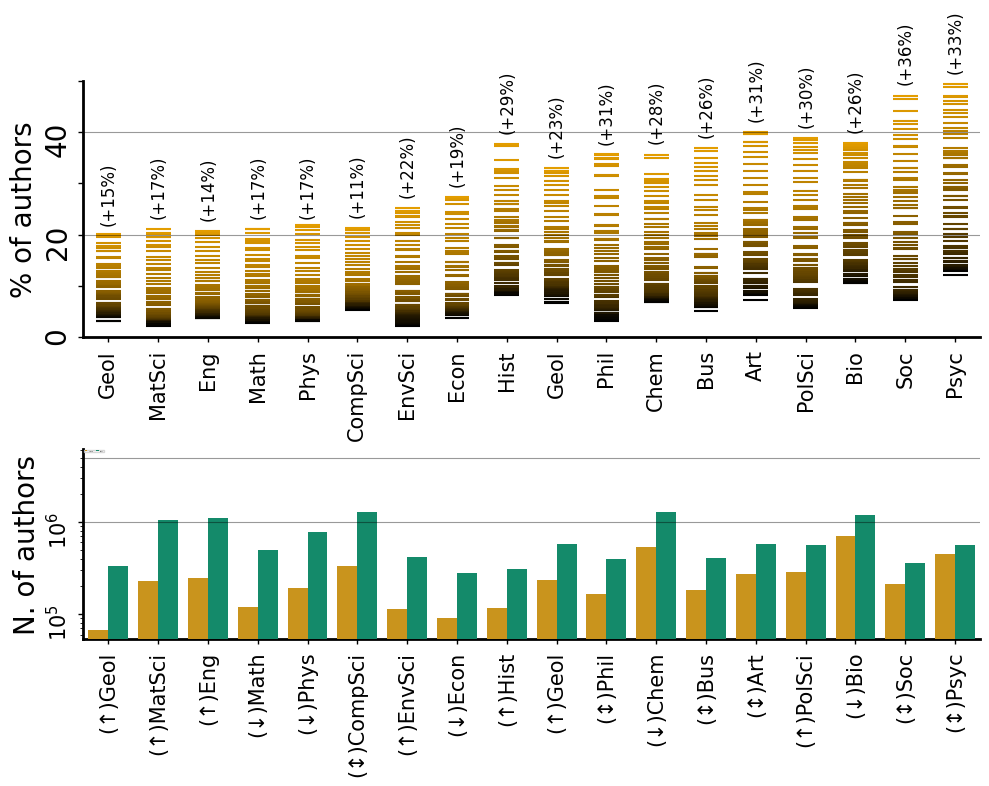

In [16]:
plot_proportion_researchers_by_variable(mystats, Dict_percentage_women_over_time, Variable = 'authors', 
                                        return_organized_fields=False, organized_fields_input=Organized_Fields)

['Mathematics', 'Physics', 'Materials Science', 'Engineering', 'Geology', 'Computer Science', 'Economics', 'Environmental Science', 'Chemistry', 'History', 'Philosophy', 'Geography', 'Business', 'Art', 'Biology', 'Political Science', 'Sociology', 'Psychology']


/var/folders/g9/w5sz99g97v16535_cc3rmjsm0000gn/T/ipykernel_11394/951877374.py:38: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[row_plt].set_xticklabels(['']+[Dict_achronyms[i] for i in Organized_Fields], size=15, rotation = 90)
/var/folders/g9/w5sz99g97v16535_cc3rmjsm0000gn/T/ipykernel_11394/951877374.py:39: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[row_plt].set_yticklabels([0,'',20,'',40,' '], size=20, rotation = 90)
/var/folders/g9/w5sz99g97v16535_cc3rmjsm0000gn/T/ipykernel_11394/951877374.py:79: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[row_plt].set_yticklabels(axes[row_plt].get_yticklabels(), size=15, rotation = 90)


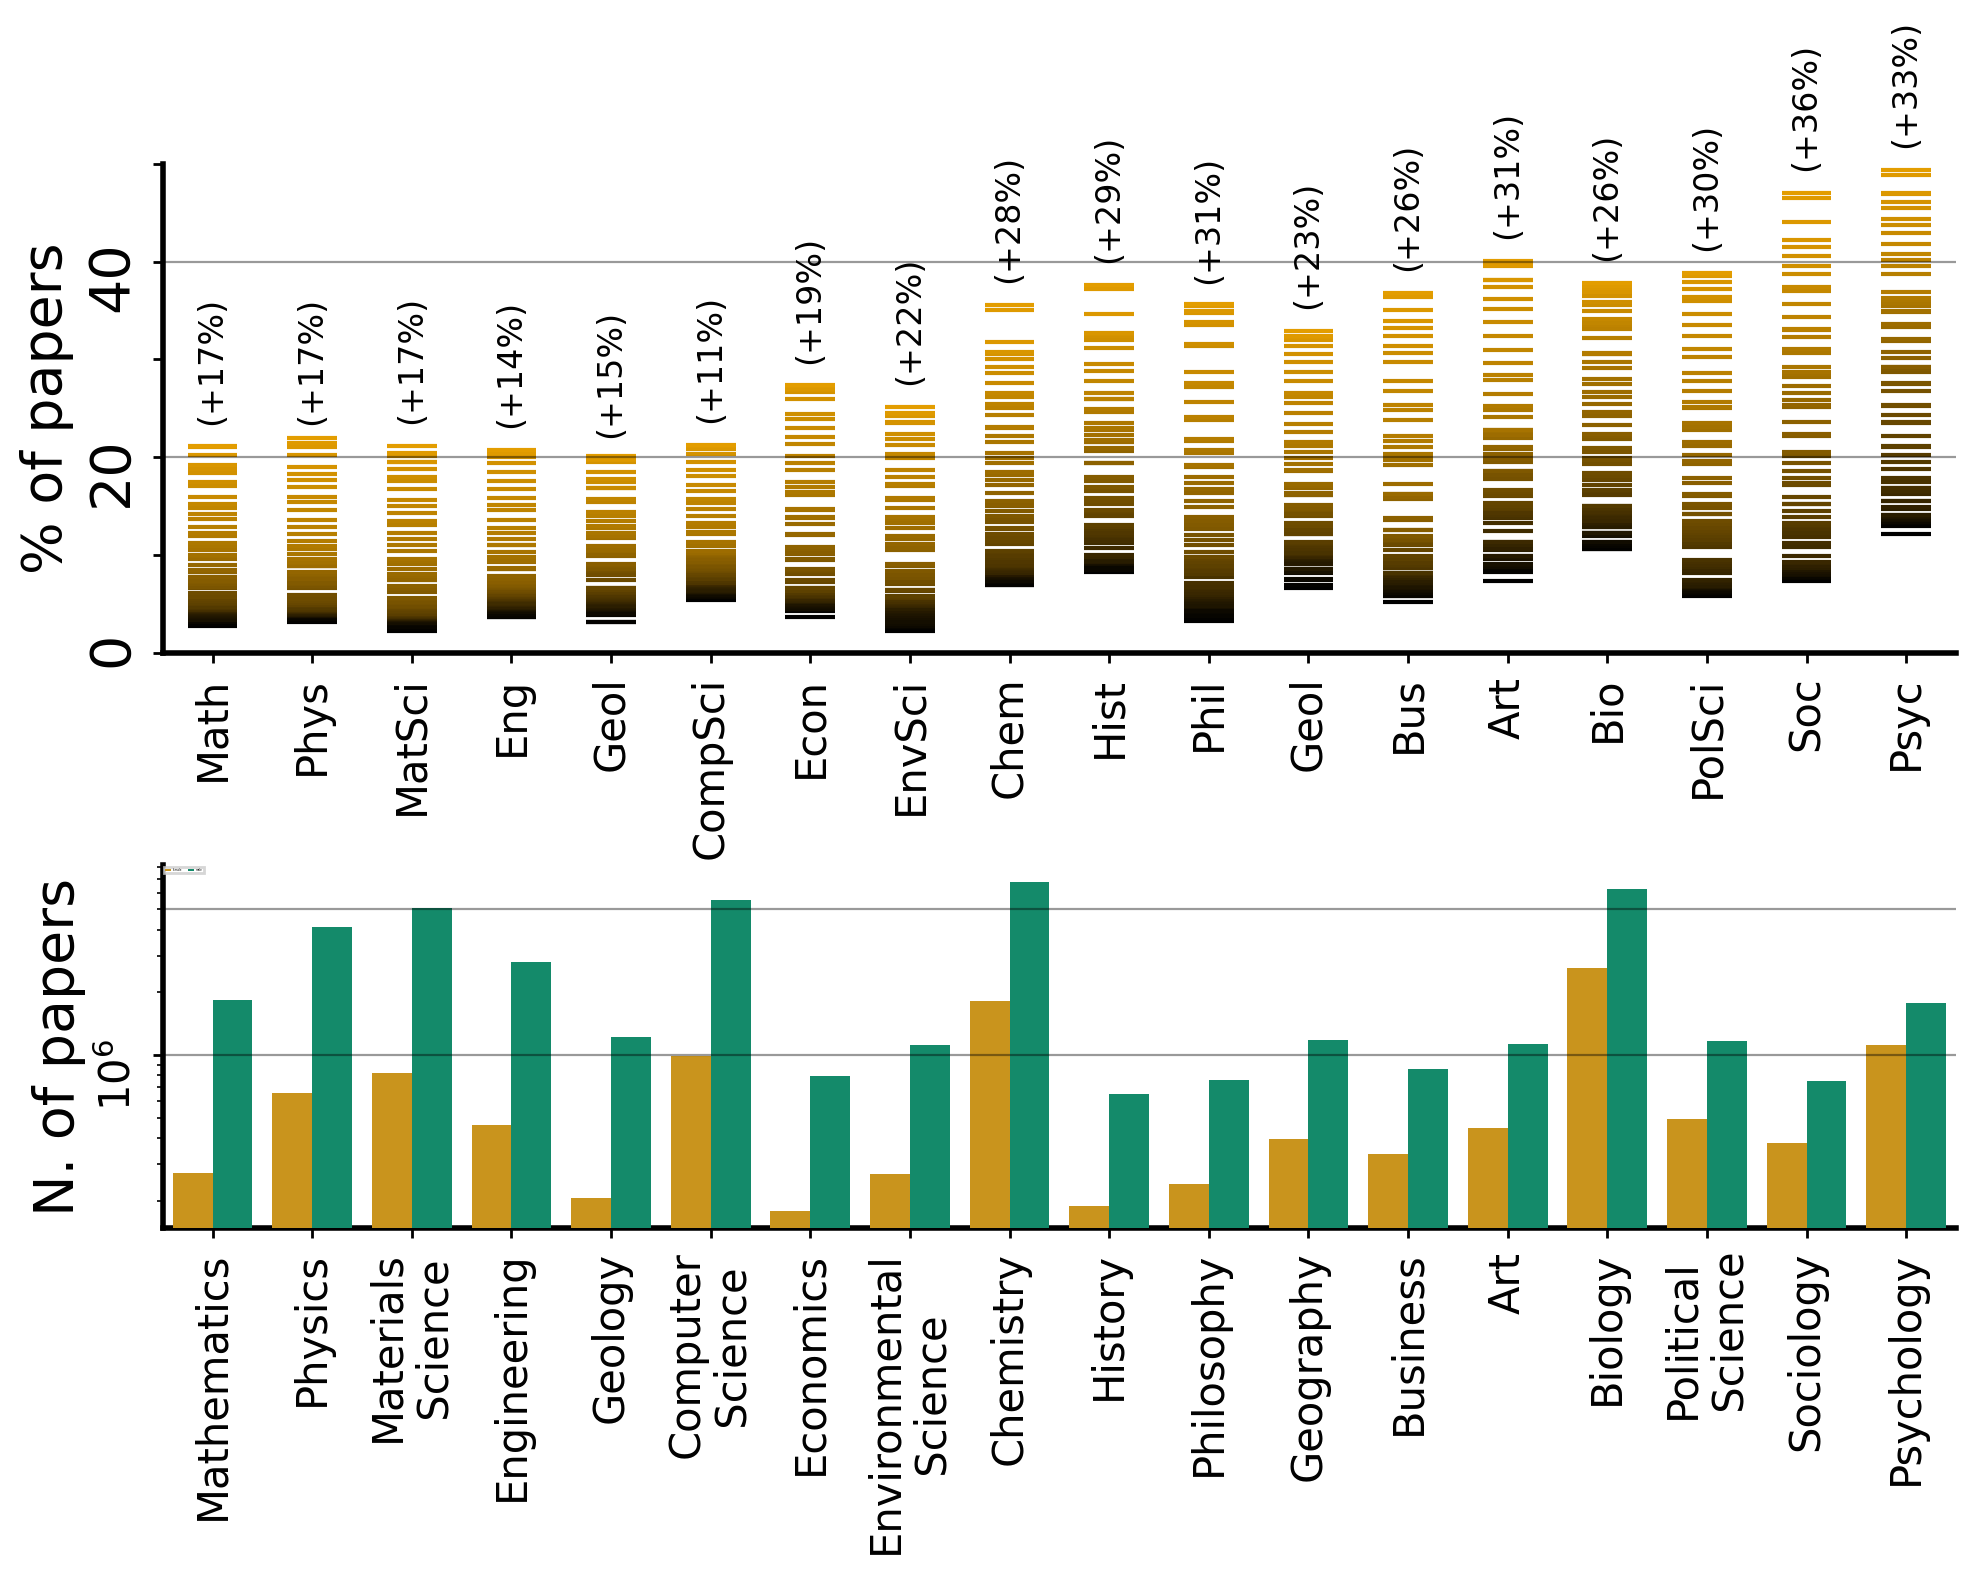

In [18]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

Organized_Fields = plot_proportion_researchers_by_variable(mystats, Dict_percentage_women_over_time,Variable = 'papers')

In [19]:
#Read the dataset for the rankings:
Distr_info = pd.read_csv('Distr_info_all.csv')

/var/folders/g9/w5sz99g97v16535_cc3rmjsm0000gn/T/ipykernel_11394/1942304947.py:82: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig('Min_values_variables_to_be_in_top_ranked.pdf', bbox_inches='tight')
/var/folders/g9/w5sz99g97v16535_cc3rmjsm0000gn/T/ipykernel_11394/1942304947.py:82: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig('Min_values_variables_to_be_in_top_ranked.pdf', bbox_inches='tight')
/Users/anajaramillo/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


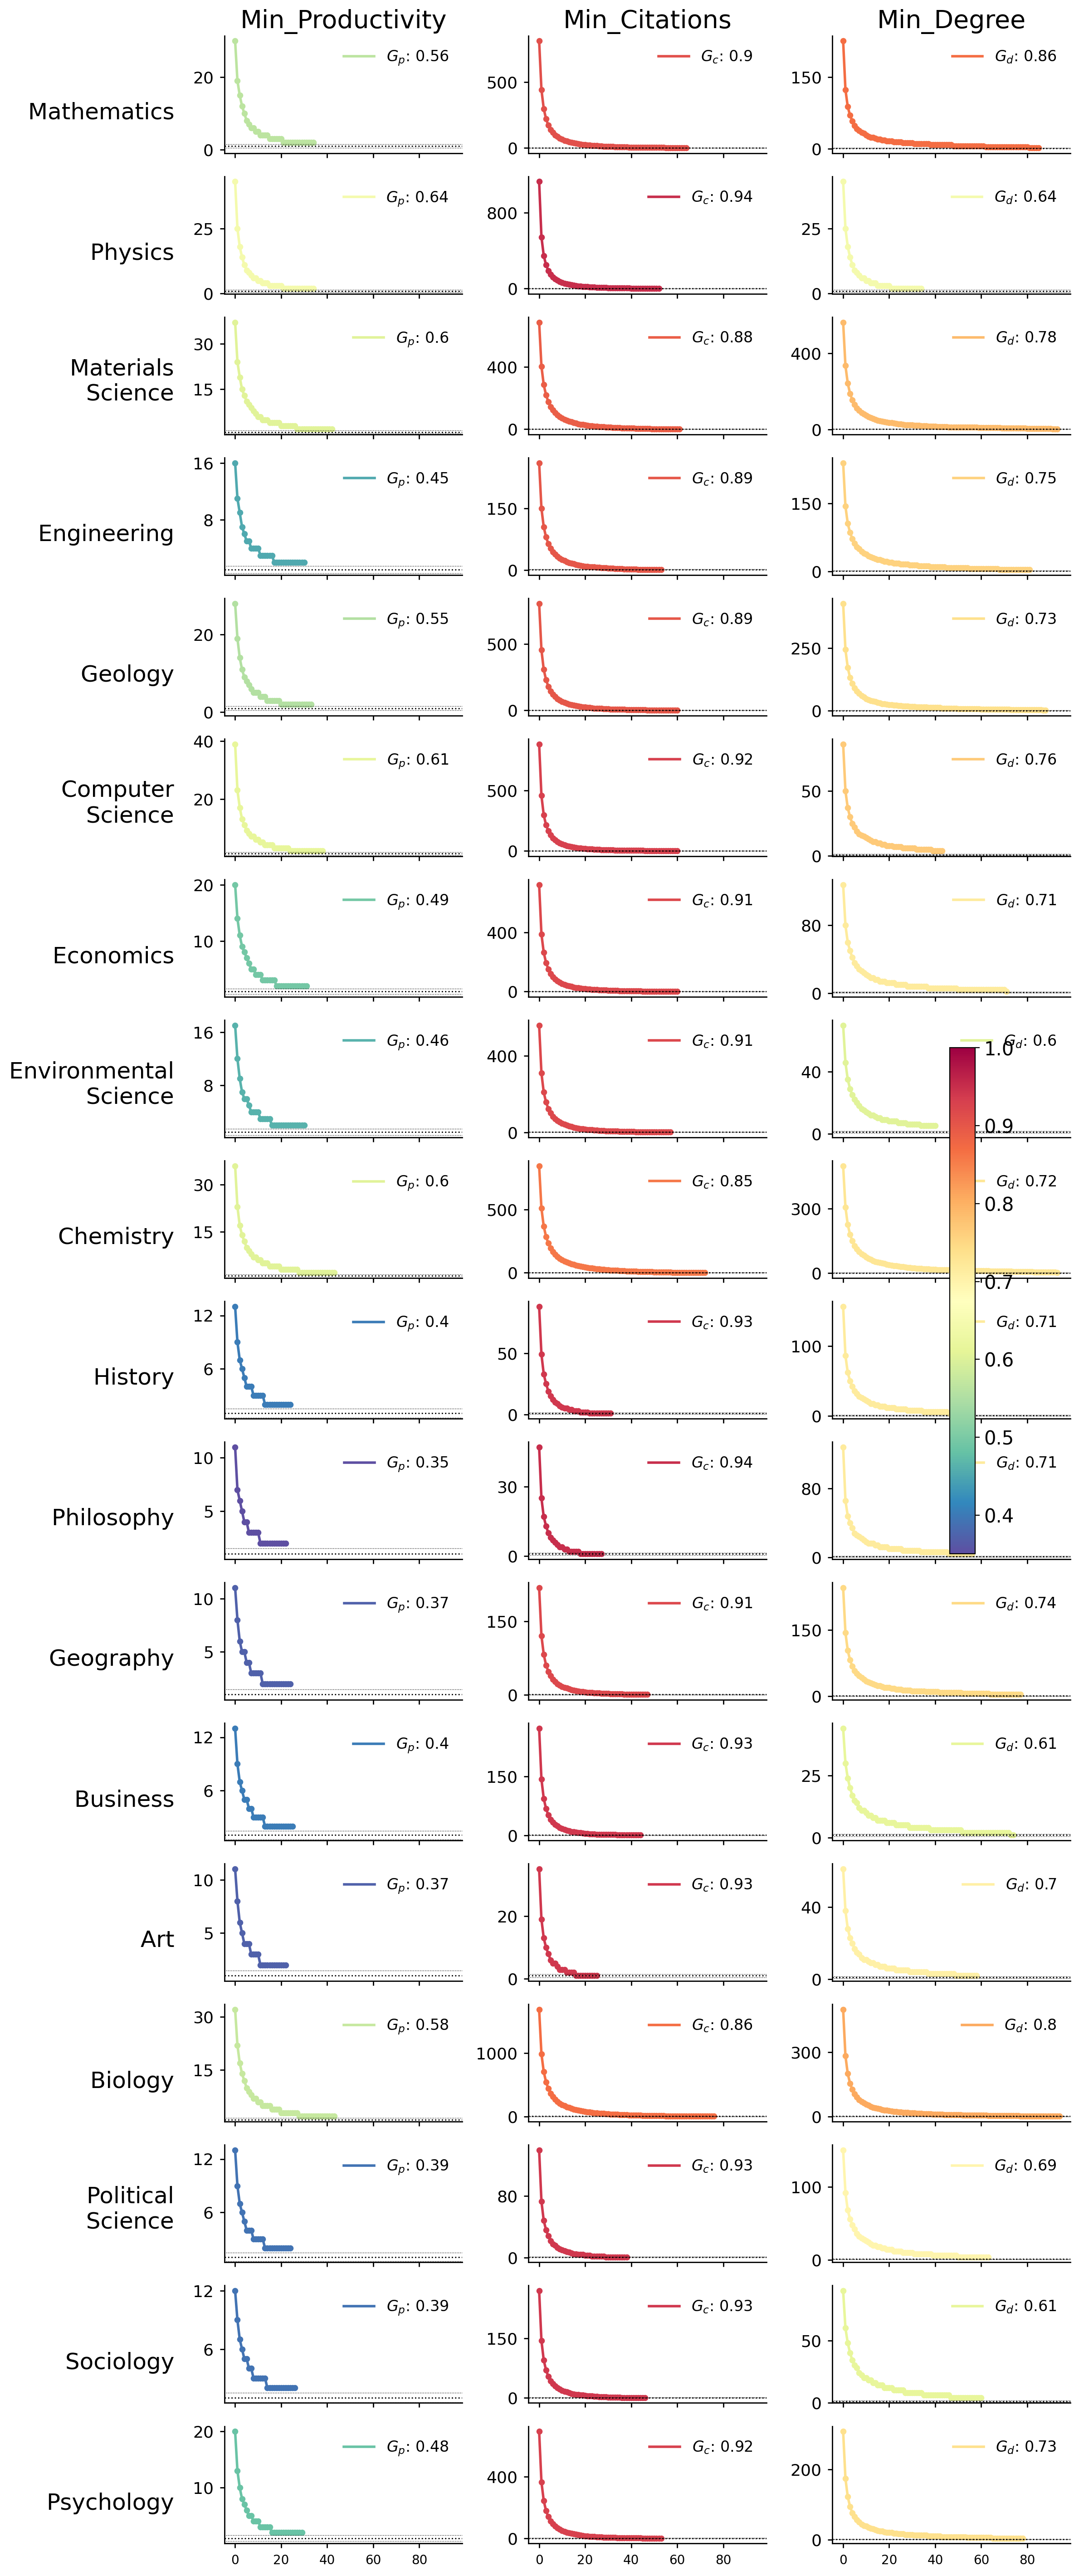

In [25]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

n_colors = int(np.round((100-35),0))
colours = plt.cm.Spectral_r(np.linspace(0, 1, n_colors))

import matplotlib as mpl
from matplotlib.colors import Normalize
import matplotlib.cm as cm

normalizer=Normalize(0.35,1)
im=cm.ScalarMappable(cmap='Spectral_r', norm=normalizer)

# def plot_distribution_info_top_percentile(Distr_info, Organized_Fields):
fig, ax = plt.subplots(ncols=3, \
                       nrows=len(Organized_Fields),\
                      figsize=(12,len(fields)*1.5), sharex=True, sharey=False, tight_layout=False)

for row_plt, Field in enumerate(Organized_Fields):

    Gini_var = {}
    for col_plt, variable in enumerate(['Productivity', 'Citations', 'Degree']):
        Filtered_Distr_info = Distr_info[(Distr_info['Variable']==variable) & (Distr_info['Field']==Field)]
        Filtered_Distr_info = Filtered_Distr_info.sort_values('Prop_Top')

        y = list(Filtered_Distr_info['Min_var'])
        x = range(len(list(Filtered_Distr_info['Prop_Top'])))
        Gini_var[variable] = np.round(list(Filtered_Distr_info['Gini'])[0],2)

        ax[row_plt][col_plt].plot(x,y, color = colours[int(Gini_var[variable]*100)-35], alpha = 1, lw=2)
        ax[row_plt][col_plt].scatter(x,y, color = colours[int(Gini_var[variable]*100)-35], alpha = 1, s=15)
        ax[row_plt][col_plt].yaxis.set_major_locator(plt.MaxNLocator(2))
        
        ax[row_plt][col_plt].tick_params(axis='y', labelsize=13)
    
        if col_plt == 0:
            ax[row_plt][col_plt].legend(['$G_{p}$: '+ str(Gini_var['Productivity'])], fontsize=12, frameon=False)
        elif col_plt == 1:
            ax[row_plt][col_plt].legend(['$G_{c}$: '+ str(Gini_var['Citations'])], fontsize=12, frameon=False)
        else:
            ax[row_plt][col_plt].legend(['$G_{d}$: '+ str(Gini_var['Degree'])], fontsize=12, frameon=False)

        if col_plt == 0:
            if len(Field.split(' ')) == 2:
                field_plot = Field.replace(' ', '  \n ')
            else:
                field_plot = Field
            ax[row_plt][col_plt].set_ylabel(field_plot+'  ', size=18, rotation=0, labelpad=10, ha='right')
            ax[row_plt][col_plt].yaxis.set_label_coords(-.15, .25)
            ax[row_plt][col_plt].xaxis.set_tick_params(width=1,  pad=2)
            ax[row_plt][col_plt].yaxis.set_tick_params(width=1,  pad=1)
            
#             ax[row_plt][col_plt].tick_params(axis='y', which='major', pad=1, labelsize=12)
            ax[row_plt][col_plt].yaxis.set_ticks_position('left')

    #         ax[row_plt][col_plt].set_ylim(0.5, 1.5)

        if row_plt == 0:
            ax[row_plt][col_plt].set_title('Min_'+variable, fontdict={'fontsize': 20, 'fontweight': 'medium'})

        if row_plt == len(fields)-1:
            ax[row_plt][col_plt].set_xticklabels(['', 0,25,50,75], size=18)

        ax[row_plt][col_plt].spines['right'].set_visible(False)
        ax[row_plt][col_plt].spines['top'].set_visible(False)
        ax[row_plt][col_plt].xaxis.set_tick_params(width=1,  pad=5)
        ax[row_plt][col_plt].yaxis.set_tick_params(width=1, pad=5)

        for axis in ['top','bottom','left','right']:
            ax[row_plt][col_plt].spines[axis].set_linewidth(1)
            ax[row_plt][col_plt].spines[axis].set_color("black")
            ax[row_plt][col_plt].spines[axis].set_zorder(0)

        ax[row_plt][col_plt].axhline(1, linestyle='dotted', linewidth=1, color='black')
        ax[row_plt][col_plt].axhline(0.5, linestyle='dotted', linewidth=0.5, color='black')
        ax[row_plt][col_plt].axhline(1.5, linestyle='dotted', linewidth=0.5, color='black')

plt.subplots_adjust(wspace=0.3, hspace=0.2)

cb = fig.colorbar(im, ax=ax.ravel().tolist(), fraction = 0.03, shrink=0.8, drawedges = False)
cb.ax.tick_params(labelsize=15)
plt.savefig('Min_values_variables_to_be_in_top_ranked.pdf', bbox_inches='tight')
plt.show()

In [26]:
Stats_rep_top = pd.read_csv('Stats_rep_top_all_1.csv')

In [27]:
Filtered_stats = mystats[(mystats['Type'] == 'papers') & (mystats['Metric'] == 'percentage')]

In [38]:
def plot_representation_changes_over_top_percentile(Stats_rep_top, Organized_Fields,Max_percentile = None):
    fig, ax = plt.subplots(ncols=3, \
                                           nrows=len(Organized_Fields),\
                                          figsize=(9.5,len(fields)*1.2), sharex=True, sharey=True, tight_layout=False)

    for row_plt, Field in enumerate(Organized_Fields):
        for col_plt, Variable in enumerate(['Productivity', 'Citations', 'Degree']):

            for Gender in ['male', 'female']:
                Filtered_Stats_rep_top = Stats_rep_top[(Stats_rep_top['Variable']==Variable) & (Stats_rep_top['Field']==Field) &\
                                         (Stats_rep_top['Gender']==Gender)]
                Filtered_Stats_rep_top = Filtered_Stats_rep_top.sort_values('Prop_Top')

                y = list(Filtered_Stats_rep_top['Representation'])
                x = range(len(list(Filtered_Stats_rep_top['Prop_Top'])))

                ax[row_plt][col_plt].plot(x,y, color =colors[Gender], alpha =0.8, lw=2)
                ax[row_plt][col_plt].scatter(x,y, color =colors[Gender], alpha =0.8, s=5)

            if col_plt == 0:
                if len(Field.split(' ')) == 2:
                    field_plot = Field.replace(' ', '  \n ')
                else:
                    field_plot = Field
                ax[row_plt][col_plt].set_ylabel(field_plot+'  ', size=18, rotation=0, labelpad=10, ha='right')
                ax[row_plt][col_plt].yaxis.set_label_coords(-.15, .25)
                ax[row_plt][col_plt].xaxis.set_tick_params(width=1,  pad=2)
                ax[row_plt][col_plt].yaxis.set_tick_params(width=1,  pad=1)
                ax[row_plt][col_plt].set_yticklabels(['', 0.5 ,1 , 1.5], size=12)
                ax[row_plt][col_plt].tick_params(axis='y', which='major', pad=1)
                ax[row_plt][col_plt].yaxis.set_ticks_position('left')

            ax[row_plt][col_plt].set_ylim(0.3, 1.5)

            if row_plt == 0:
                ax[row_plt][col_plt].set_title(Variable, fontdict={'fontsize': 20, 'fontweight': 'medium'})

            if row_plt == len(fields)-1:
                ax[row_plt][col_plt].set_xticklabels(['',0,25,50,75], size=18)

            ax[row_plt][col_plt].spines['right'].set_visible(False)
            ax[row_plt][col_plt].spines['top'].set_visible(False)
            ax[row_plt][col_plt].xaxis.set_tick_params(width=1,  pad=5)
            ax[row_plt][col_plt].yaxis.set_tick_params(width=1, pad=5)

            for axis in ['top','bottom','left','right']:
                ax[row_plt][col_plt].spines[axis].set_linewidth(0.8)
                ax[row_plt][col_plt].spines[axis].set_color("black")
                ax[row_plt][col_plt].spines[axis].set_zorder(0)


            
            if Max_percentile != None:
                ax[row_plt][col_plt].text(((Max_percentile[Field][Variable]+10)*95/100)/100+0.02,0.5,
                                          str(Max_percentile[Field][Variable]), size=15, 
                                          transform=ax[row_plt][col_plt].transAxes)
                ax[row_plt][col_plt].axhline(1, xmin=0, xmax=((Max_percentile[Field][Variable]+5))/100, linestyle='-', linewidth=0.7, color='black')
            ax[row_plt][col_plt].axhline(0.5, linestyle='-', linewidth=0.5, color='black', alpha = 0.6)
            ax[row_plt][col_plt].axhline(1.5, linestyle='-', linewidth=0.5, color='black', alpha = 0.6)
    
    plt.savefig('Representation_top_ranked_positions.pdf', bbox_inches='tight')
    plt.show()

In [31]:
max_iter = {}
for field in Organized_Fields:
    max_iter[field] = {}
    print(field)
    for Variable in ['Productivity', 'Citations', 'Degree']:
        print(Variable)
        Reached = False
        Prop_Top = 1
        while Reached != True:
            
            Filtered_PD = Stats_rep_top[(Stats_rep_top.Field==field) & (Stats_rep_top.Variable==Variable) & (Stats_rep_top.Prop_Top==Prop_Top)]
            Value_women = Filtered_PD[Filtered_PD.Gender=='female'].Representation
            Value_men = Filtered_PD[Filtered_PD.Gender=='male'].Representation
            
            if Variable == 'Degree':
                Min_difference = {field:0.05 if field not in ['Philosophy', 'Geology', 'Sociology'] else 0.0005 for field in Organized_Fields }
            else:
                Min_difference = {field:0.05 for field in Organized_Fields }
                
            if np.abs(float(Value_women)-float(Value_men))<=Min_difference[field]:
                Reached = True
                max_iter[field][Variable] = Prop_Top
            else:
                Prop_Top +=1
            

Mathematics
Productivity
Citations
Degree


/var/folders/g9/w5sz99g97v16535_cc3rmjsm0000gn/T/ipykernel_11394/1773295162.py:20: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  if np.abs(float(Value_women)-float(Value_men))<=Min_difference[field]:


Physics
Productivity
Citations
Degree
Materials Science
Productivity
Citations
Degree
Engineering
Productivity
Citations
Degree
Geology
Productivity
Citations
Degree
Computer Science
Productivity
Citations
Degree
Economics
Productivity
Citations
Degree
Environmental Science
Productivity
Citations
Degree
Chemistry
Productivity
Citations
Degree
History
Productivity
Citations
Degree
Philosophy
Productivity
Citations
Degree
Geography
Productivity
Citations
Degree
Business
Productivity
Citations
Degree
Art
Productivity
Citations
Degree
Biology
Productivity
Citations
Degree
Political Science
Productivity
Citations
Degree
Sociology
Productivity
Citations
Degree
Psychology
Productivity
Citations
Degree


In [32]:
List_index_filter = []
for field in max_iter.keys():
    for variable in max_iter[field].keys():
        Prop_Top = max_iter[field][variable]
        Filtered_PD = Stats_rep_top[(Stats_rep_top.Field==field) & (Stats_rep_top.Variable==variable) & (Stats_rep_top.Prop_Top<=Prop_Top)]
        List_index_filter += list(Filtered_PD.index)

/var/folders/g9/w5sz99g97v16535_cc3rmjsm0000gn/T/ipykernel_11394/3745985928.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[row_plt][col_plt].set_yticklabels(['', 0.5 ,1 , 1.5], size=12)
/var/folders/g9/w5sz99g97v16535_cc3rmjsm0000gn/T/ipykernel_11394/3745985928.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[row_plt][col_plt].set_yticklabels(['', 0.5 ,1 , 1.5], size=12)
/var/folders/g9/w5sz99g97v16535_cc3rmjsm0000gn/T/ipykernel_11394/3745985928.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[row_plt][col_plt].set_yticklabels(['', 0.5 ,1 , 1.5], size=12)
/var/folders/g9/w5sz99g97v16535_cc3rmjsm0000gn/T/ipykernel_11394/3745985928.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, 

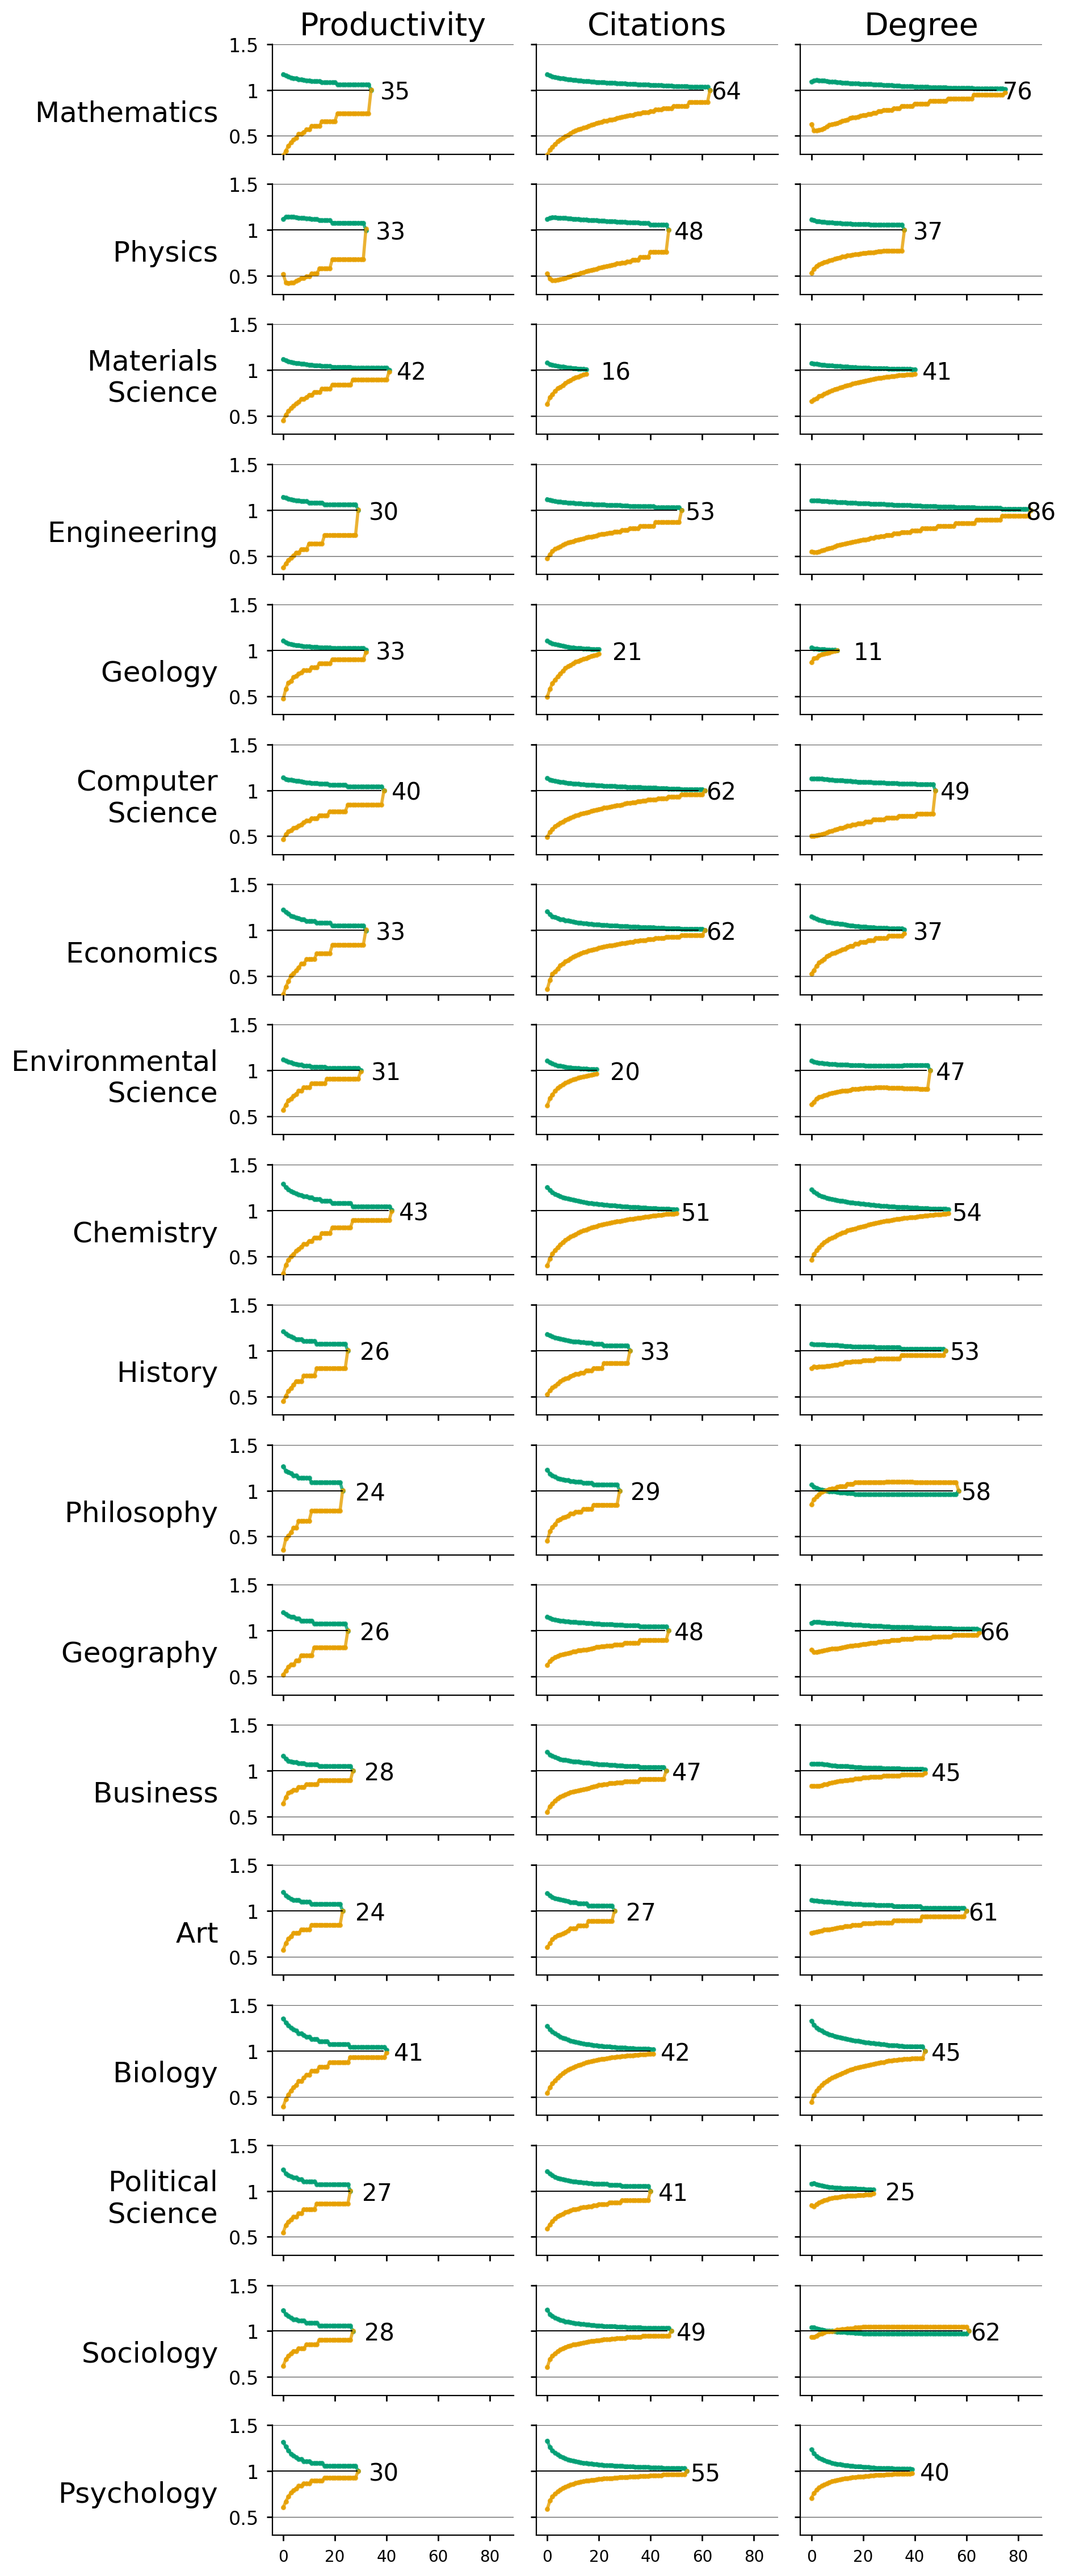

In [39]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
Stats_rep_top_filtered = Stats_rep_top.iloc[List_index_filter]
plot_representation_changes_over_top_percentile(Stats_rep_top_filtered, Organized_Fields,max_iter)

In [45]:
# !pip install "pandas<2.0.0"
DF_Prop_by_prop_gender = read_pickle('DF_Prop_by_prop_gender.pkl')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.9/11.9 MB 1.0 MB/s  0:00:11 eta 0:00:01
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.3
    Uninstalling pandas-2.2.3:
      Successfully uninstalled pandas-2.2.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
multisoc 0.1.1 requires pandas>=2.0.3, but you have pandas 1.5.3 which is incompatible.


In [49]:
Dict_markers = {0.5:'o',0.6:"P",0.7:'<',0.8:'*'}
colors ={
    "all":"grey",
    "men":"#009E73",
    "women": "#E69F00",   
    "male":"#009E73",
    "female": "#E69F00",   
    "portuguese":"#377eb8",
    "english": "#d95f02",
    np.nan: 'grey'
    
}

/var/folders/g9/w5sz99g97v16535_cc3rmjsm0000gn/T/ipykernel_11394/3636935691.py:40: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['']+[i for i in Organized_fields if i != 'Medicine'], rotation=90)


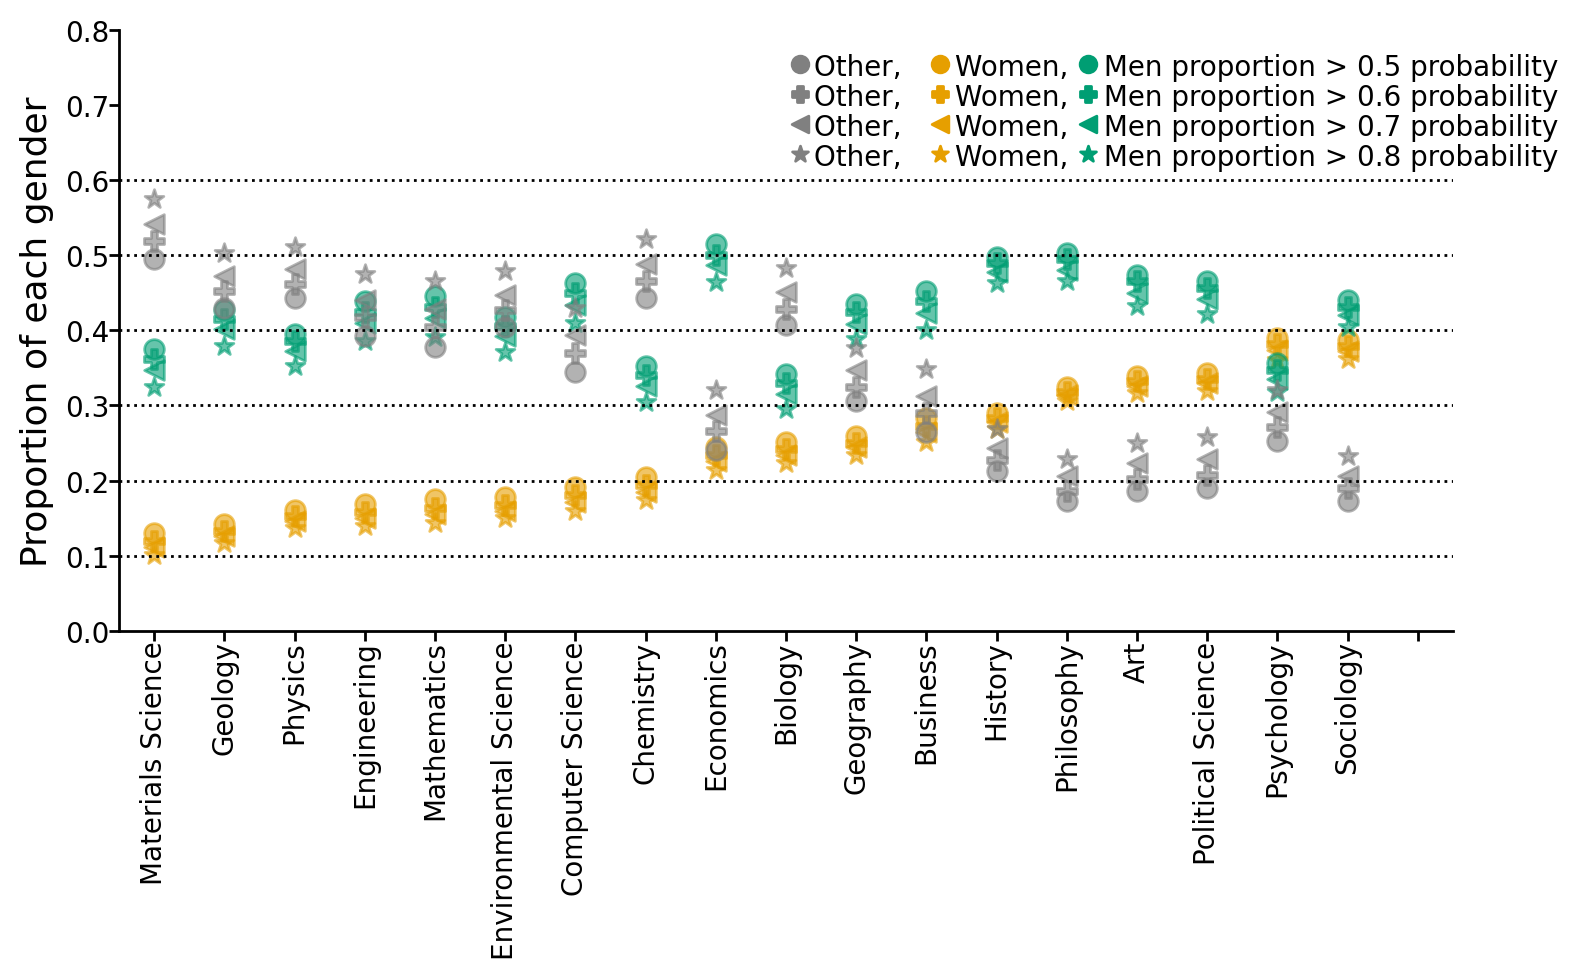

In [53]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

fig, ax = plt.subplots(ncols=1, nrows=1,figsize=(8,5), 
                           dpi=100, tight_layout=True)

Organized_fields = ['Materials Science',
 'Geology',
 'Physics',
 'Engineering',
 'Mathematics',
 'Environmental Science',
 'Computer Science',
 'Chemistry',
 'Economics',
 'Biology',
 'Geography',
 'Business',
 'History',
 'Philosophy',
 'Art',
 'Political Science',
 'Psychology',
 'Sociology']

for j,field in enumerate(Organized_fields):
    if field != 'Medicine':
        for gender in ['female', 'male', np.nan]:
            for i in [0.5,0.6,0.7,0.8]:
                y_value = DF_Prop_by_prop_gender[field][gender][i]
                x_value = j
                plt.scatter(x_value,y_value, color = colors[gender], s=50, alpha=0.60, marker = Dict_markers[i])

    
# plt.xlabel('Frequency names', rotation=0,size=13, ha='center')
plt.ylabel('Proportion of each gender', rotation=90,size=13, ha='center')

ax.xaxis.set_tick_params(width=1,  pad=0)
ax.yaxis.set_tick_params(width=1,  pad=0)
ax.set_xticklabels(['']+[i for i in Organized_fields if i != 'Medicine'], rotation=90)


# ax.set_xticklabels([i.split(',')[0]+', \n'+i.split(',')[1][:-1]+']' for i in x_values])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

for i,j in enumerate([0.5,0.6,0.7,0.8]):
    plt.scatter(9.2,.715-0.04*i+0.04, marker=Dict_markers[j], color=colors[np.nan])
    plt.text(9.4,0.7-0.04*i+0.04, 'Other, ')
    plt.scatter(11.2,.715-0.04*i+0.04, marker=Dict_markers[j], color=colors['female'])
    plt.text(11.4,0.7-0.04*i+0.04, 'Women, ')
    plt.scatter(13.3,0.715-0.04*i+0.04, marker=Dict_markers[j], color=colors['male'])
    plt.text(13.4,0.7-0.04*i+0.04, ' Men proportion > '+str(j)+' probability')
    
plt.locator_params(axis='x', nbins=22) 
plt.ylim(0,0.8)
plt.xlim(-0.5,18.5)

# plt.axhline(0.1, xmin=0, xmax=0.6, linestyle='dotted', linewidth=1, color='black')
for i in [0.1,0.2,0.3,0.4,0.5,0.6]:
    plt.axhline(i, linestyle='dotted', linewidth=1, color='black')


for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1)
    ax.spines[axis].set_color("black")
    ax.spines[axis].set_zorder(0)
# plt.xticks(rotation=70)
plt.savefig('Proportions_gender_different_probability_thresholds.pdf', bbox_inches='tight')
plt.show()
    


/var/folders/g9/w5sz99g97v16535_cc3rmjsm0000gn/T/ipykernel_11394/306746893.py:42: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['']+[i for i in Organized_fields if i != 'Medicine'], rotation=90)


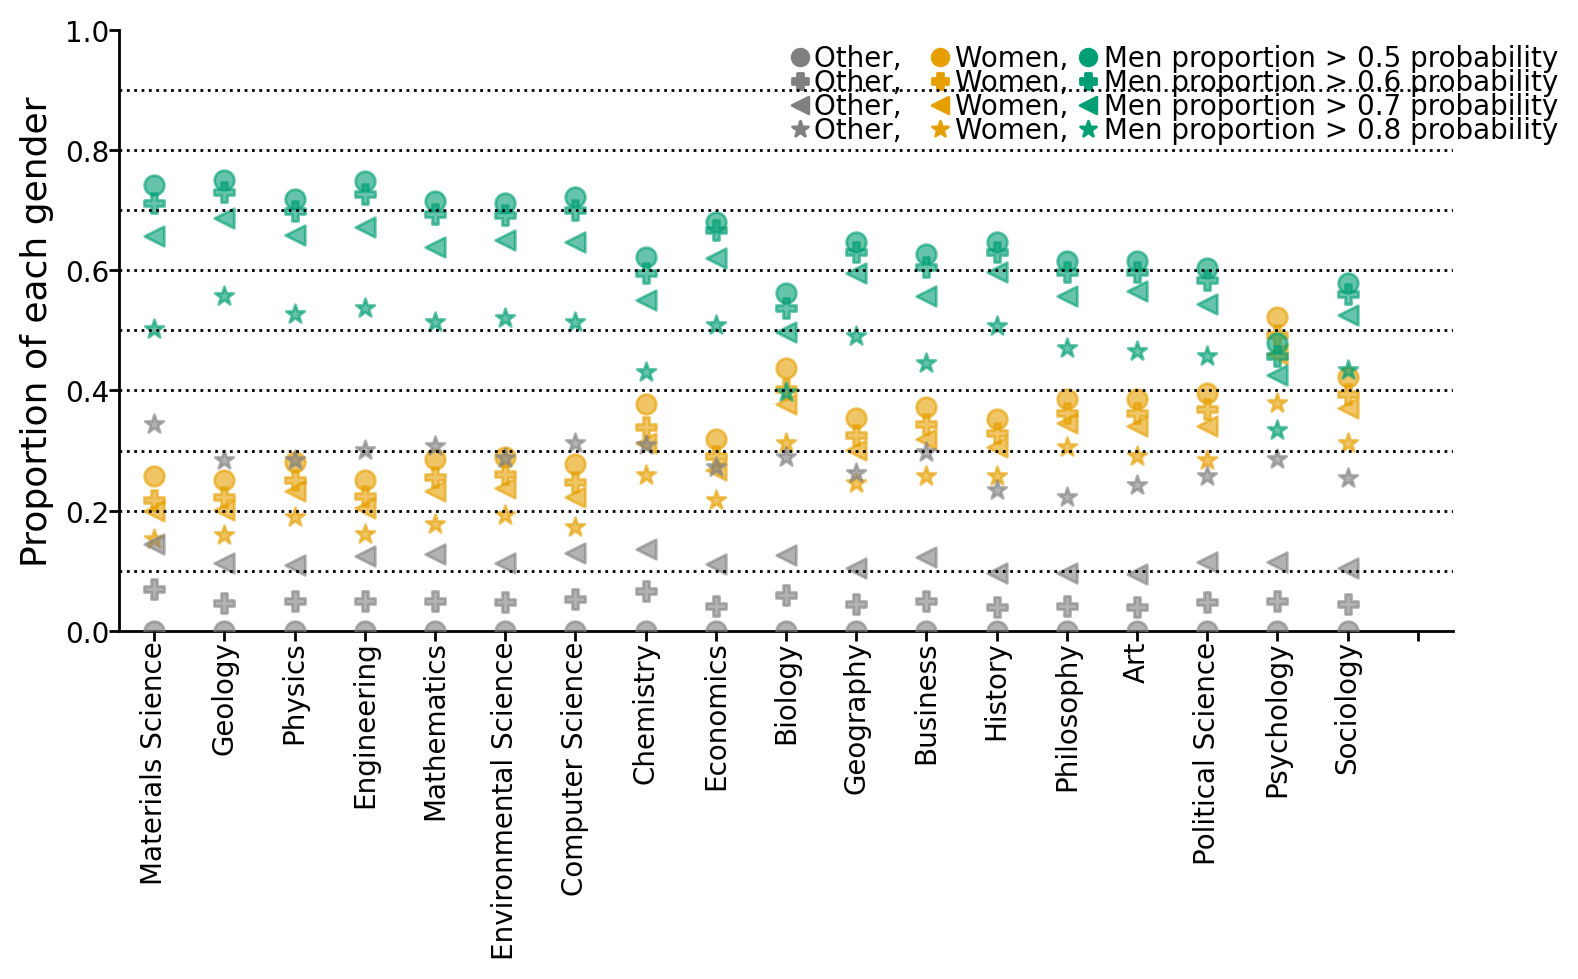

In [60]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

fig, ax = plt.subplots(ncols=1, nrows=1,figsize=(8,5), 
                           dpi=100, tight_layout=True)

DF_Prop_by_prop_gender = read_pickle('DF_Prop_by_prop_gender_namsor.pkl')

Organized_fields = ['Materials Science',
 'Geology',
 'Physics',
 'Engineering',
 'Mathematics',
 'Environmental Science',
 'Computer Science',
 'Chemistry',
 'Economics',
 'Biology',
 'Geography',
 'Business',
 'History',
 'Philosophy',
 'Art',
 'Political Science',
 'Psychology',
 'Sociology']

for j,field in enumerate(Organized_fields):
    if field != 'Medicine':
        for gender in ['female', 'male', np.nan]:
            for i in [0.5,0.6,0.7,0.8]:
                y_value = DF_Prop_by_prop_gender[field][gender][i]
                x_value = j
                plt.scatter(x_value,y_value, color = colors[gender], s=50, alpha=0.60, marker = Dict_markers[i])

    
# plt.xlabel('Frequency names', rotation=0,size=13, ha='center')
plt.ylabel('Proportion of each gender', rotation=90,size=13, ha='center')

ax.xaxis.set_tick_params(width=1,  pad=0)
ax.yaxis.set_tick_params(width=1,  pad=0)
ax.set_xticklabels(['']+[i for i in Organized_fields if i != 'Medicine'], rotation=90)


# ax.set_xticklabels([i.split(',')[0]+', \n'+i.split(',')[1][:-1]+']' for i in x_values])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

for i,j in enumerate([0.5,0.6,0.7,0.8]):
    plt.scatter(9.2,.915-0.04*i+0.04, marker=Dict_markers[j], color=colors[np.nan])
    plt.text(9.4,0.9-0.04*i+0.04, 'Other, ')
    plt.scatter(11.2,.915-0.04*i+0.04, marker=Dict_markers[j], color=colors['female'])
    plt.text(11.4,0.9-0.04*i+0.04, 'Women, ')
    plt.scatter(13.3,0.915-0.04*i+0.04, marker=Dict_markers[j], color=colors['male'])
    plt.text(13.4,0.9-0.04*i+0.04, ' Men proportion > '+str(j)+' probability')
    
plt.locator_params(axis='x', nbins=22) 
plt.ylim(0,1)
plt.xlim(-0.5,18.5)

# plt.axhline(0.1, xmin=0, xmax=0.6, linestyle='dotted', linewidth=1, color='black')
for i in [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]:
    plt.axhline(i, linestyle='dotted', linewidth=1, color='black')


for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1)
    ax.spines[axis].set_color("black")
    ax.spines[axis].set_zorder(0)
# plt.xticks(rotation=70)
plt.savefig('Proportions_gender_different_probability_thresholds_namsor.pdf', bbox_inches='tight')
plt.show()
    
